In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os, shutil
from tensorflow import keras
import keras.utils as image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [2]:
model= VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [3]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
dataset=r'C:\Users\Dell\Desktop\data\ML-notebooks-main\dataset\buildingVSforest'

In [5]:
dataset_file= r'C:\Users\Dell\Desktop\data\ML-notebooks-main\dataset\Building_vs_Forest'
os.mkdir(dataset_file)

In [6]:
train_dir= os.path.join(dataset_file,'train')
os.mkdir(train_dir)

In [7]:
validation_dir= os.path.join(dataset_file,'validation')
os.mkdir(validation_dir)

In [8]:
test_dir= os.path.join(dataset_file,'test')
os.mkdir(test_dir)

In [9]:
train_building=os.path.join(train_dir,'Building')
os.mkdir(train_building)

In [10]:
train_forest=os.path.join(train_dir,'Forest')
os.mkdir(train_forest)

In [11]:
validation_building=os.path.join(validation_dir,'Building')
os.mkdir(validation_building)

In [12]:
validation_forest=os.path.join(validation_dir,'Forest')
os.mkdir(validation_forest)

In [13]:
test_building=os.path.join(test_dir,'Building')
os.mkdir(test_building)

In [14]:
test_forest=os.path.join(test_dir,'Forest')
os.mkdir(test_forest)

In [15]:
for i in range(0,19963):
    index=f'{i}.jpg'
    src= os.path.join(dataset,'Building', index)
    dst= os.path.join(train_building, index)
    if os.path.exists(src):
       shutil.copyfile(src,dst)
    else:
        pass

In [16]:
for i in range(19963,23475):
    index=f'{i}.jpg'
    src= os.path.join(dataset,'Building', index)
    dst= os.path.join(validation_building, index)
    if os.path.exists(src):
       shutil.copyfile(src,dst)
    else:
        pass

In [17]:
for i in range(23475,24323):
    index=f'{i}.jpg'
    src= os.path.join(dataset,'Building', index)
    dst= os.path.join(test_building, index)
    if os.path.exists(src):
       shutil.copyfile(src,dst)
    else:
        pass

In [18]:
for i in range(0,19000):
    index=f'{i}.jpg'
    src= os.path.join(dataset,'Forest', index)
    dst= os.path.join(train_forest, index)
    if os.path.exists(src):
       shutil.copyfile(src,dst)
    else:
        pass
    

In [19]:
for i in range(19000,23613):
    index=f'{i}.jpg'
    src= os.path.join(dataset,'Forest', index)
    dst= os.path.join(validation_forest, index)
    if os.path.exists(src):
       shutil.copyfile(src,dst)
    else:
        pass
    

In [20]:
for i in range(23613,24324):
    index=f'{i}.jpg'
    src= os.path.join(dataset,'Forest', index)
    dst= os.path.join(test_forest, index)
    if os.path.exists(src):
       shutil.copyfile(src,dst)
    else:
        pass
    

In [21]:
batch_size=20
def feature_extract(directory,num_sample):
    features= np.zeros(shape=(num_sample,4,4,512))
    labels= np.zeros(shape=(num_sample))
    generator= ImageDataGenerator(rescale=1./255)
    data_generator= generator.flow_from_directory(directory, batch_size= batch_size, class_mode='binary', target_size=(150,150))
    i=0
    for input_batch, label_batch in data_generator:
        batch_len = input_batch.shape[0]  
        features_batch = model.predict(input_batch, verbose=0)
        features[i*batch_size:i*batch_size + batch_len] = features_batch
        labels[i*batch_size:i*batch_size + batch_len] = label_batch
        i+=1
        if i*batch_size >= num_sample:
            break
    return features, labels
    

In [22]:
train_features, train_labels= feature_extract(train_dir, 4325)
validation_features, validation_labels= feature_extract(validation_dir, 863)
test_features, test_labels= feature_extract(test_dir, 165)

Found 4325 images belonging to 2 classes.
Found 863 images belonging to 2 classes.
Found 165 images belonging to 2 classes.


In [23]:
train_features = np.reshape(train_features, (4325, 4*4*512))
validation_features = np.reshape(validation_features, (863, 4*4*512))
test_features = np.reshape(test_features, (165, 4*4*512))

In [24]:
print(train_features.shape)      
print(train_labels.shape)        

(4325, 8192)
(4325,)


In [25]:
mdl= Sequential()
mdl.add(Dense(250, activation='relu', input_dim=4*4*512))
mdl.add(Dropout(0.5))
mdl.add(Dense(1, activation='sigmoid'))

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
mdl.compile(loss='binary_crossentropy', optimizer= keras.optimizers.RMSprop(learning_rate=2e-5), metrics=['accuracy'] )

In [27]:
history= mdl.fit(train_features, train_labels, validation_data=(validation_features,validation_labels), batch_size= 20, epochs=30)

Epoch 1/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8721 - loss: 0.3256 - val_accuracy: 0.9965 - val_loss: 0.0389
Epoch 2/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9835 - loss: 0.0570 - val_accuracy: 0.9965 - val_loss: 0.0201
Epoch 3/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9917 - loss: 0.0342 - val_accuracy: 0.9965 - val_loss: 0.0167
Epoch 4/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9936 - loss: 0.0242 - val_accuracy: 0.9954 - val_loss: 0.0143
Epoch 5/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9933 - loss: 0.0197 - val_accuracy: 0.9965 - val_loss: 0.0123
Epoch 6/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9948 - loss: 0.0179 - val_accuracy: 0.9965 - val_loss: 0.0115
Epoch 7/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9939 - loss: 0.0231 - val_accuracy: 0.9954 - val_loss: 0.0113
Epoch 8/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9941 - loss: 0.0173 - val_accu

In [28]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

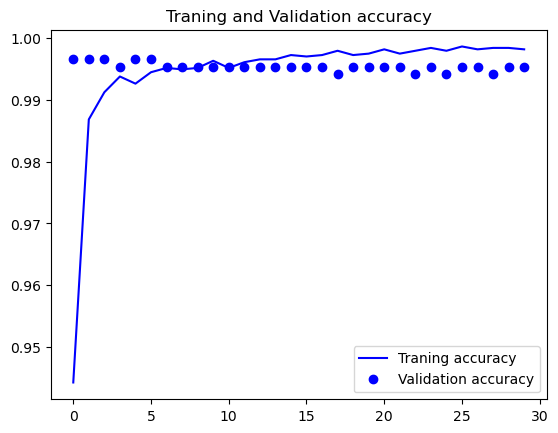

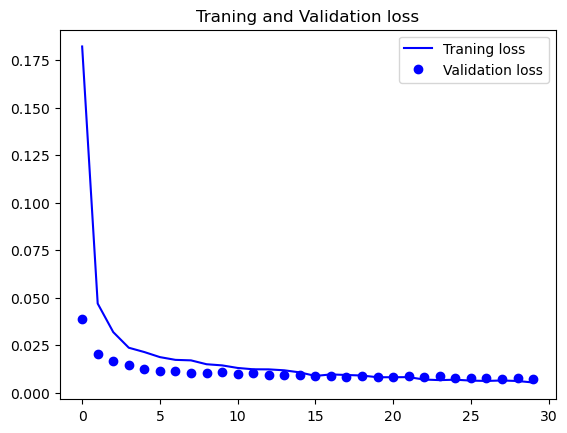

In [29]:
plt.plot(history.history['accuracy'], 'b', label='Traning accuracy')
plt.plot(history.history['val_accuracy'], 'bo', label= 'Validation accuracy')
plt.title('Traning and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(history.history['loss'], 'b', label='Traning loss')
plt.plot(history.history['val_loss'], 'bo', label= 'Validation loss')
plt.title('Traning and Validation loss')
plt.legend()
plt.show()

In [30]:
train_aug= ImageDataGenerator(rescale=1./255, rotation_range=40, height_shift_range=0.2, width_shift_range=0.2, 
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
train_generator= train_aug.flow_from_directory(train_dir, target_size=(150,150), batch_size= batch_size, class_mode='binary')
test_aug= ImageDataGenerator(rescale=1./255) 
validation_generator= test_aug.flow_from_directory(validation_dir, target_size=(150,150), batch_size=batch_size, class_mode='binary')

Found 4325 images belonging to 2 classes.
Found 863 images belonging to 2 classes.


In [31]:
modl= Sequential()
modl.add(model)
modl.add(Flatten())
modl.add(Dense(250, activation='relu'))
modl.add(Dropout(0.5))
modl.add(Dense(1, activation='sigmoid'))

In [32]:
modl.compile(loss='binary_crossentropy', optimizer= keras.optimizers.RMSprop(learning_rate= 2e-5), metrics=['accuracy'])

In [33]:
model.trainable= False

In [34]:
History= modl.fit(train_generator, validation_data= validation_generator, epochs=20)

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.8113 - loss: 0.4145 - val_accuracy: 0.9930 - val_loss: 0.0829
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.9743 - loss: 0.0961 - val_accuracy: 0.9942 - val_loss: 0.0417
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.9822 - loss: 0.0640 - val_accuracy: 0.9954 - val_loss: 0.0304
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.9802 - loss: 0.0584 - val_accuracy: 0.9954 - val_loss: 0.0256
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.9818 - loss: 0.0557 - val_accuracy: 0.9954 - val_loss: 0.0229
Epoch 6/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.9828 - loss: 0.0564 - val_accuracy: 0.9954 - val_loss: 0.0221
Epoch 7/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.9846 - loss: 0.0448 - val_accuracy: 0.9954 - val_loss: 0.0217
Epoch 8/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.9833 - loss: 0.0474 - val_accu

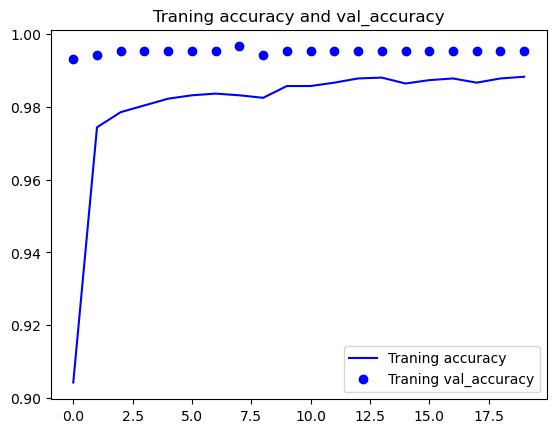

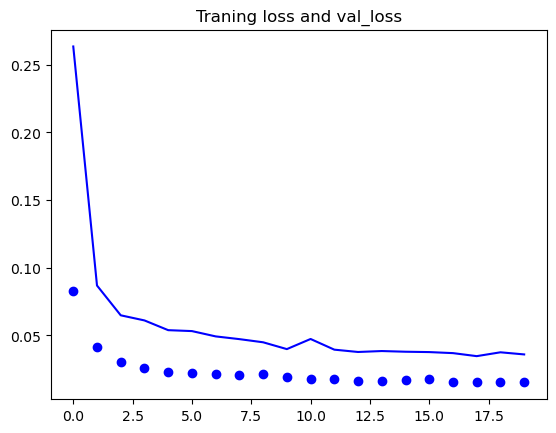

In [36]:
plt.plot(History.history['accuracy'], 'b', label= 'Traning accuracy')
plt.plot(History.history['val_accuracy'], 'bo', label= 'Traning val_accuracy')
plt.title('Traning accuracy and val_accuracy')
plt.legend()
plt.figure()
plt.plot(History.history['loss'], 'b', label= 'Traning loss')
plt.plot(History.history['val_loss'], 'bo', label= 'Traning val_loss')
plt.title('Traning loss and val_loss')
plt.show()
